In [74]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq
import matplotlib as plt
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from Bio.SeqUtils.ProtParam import ProteinAnalysis
%matplotlib inline
%pip install biopython
import seaborn as sns

# #1
##### Please properly document this function in the Jupyter notebook. Your descriptions of all functions should contain information about what the function does, as well as information about the return types and arguments.

In [75]:
def get_sequences_from_file(fasta_fn): # defining the function 
    sequence_data_dict = {} # creating an empty dictionary called 'sequence_data'
    for record in SeqIO.parse(fasta_fn, "fasta"): # parsing all the fasta files using Seq10 to read FASTA file and store in a SeqRecord 
        description = record.description.split() # splitting each word in the description
        species_name = description[1] + " " + description[2] # assigning the second and third columns of the data file as species name
        sequence_data_dict[species_name] = record.seq #adding the species name and sequence to the dictionary
    return(sequence_data_dict) #return the dictionary as the result of the function

# #2
##### YOUR STRING-TRANSLATE FUNCTION 
##### Write a function that translates sequences. All sequences start at codon position. Complete a function that translates using a loop over the string of nucleotides. Here is  some pseudo-code and suggestions

In [76]:
# aa_seq_string = '' is an empty string for the translated sequence 
# if len(seq)%3 == 0 is making codons from 3 nucleotides 
# for loop matches the stop codons to the ones in the table, 
# checks the end of the codon for a stop codon 
# then we get the amino acid and add it to the string(aa_seq_string) 

def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string = '' 
    if len(string_nucleotides)%3 == 0:                                                      
        for i in range(0, len(string_nucleotides), 3):
            codon = string_nucleotides[i:i + 3]
    if codon in ["TAA", "TAG", "AGA", "AGG"]:                               
            return aa_seq_string
    aa_seq_string+= mito_table[codon]                                        
    return aa_seq_string

# https://www.geeksforgeeks.org/dna-protein-python-3/ 

# #3
##### YOUR ALTERNATIVE FUNCTION 
##### Is there a better way to write the translation function? (Hint: yes there is.) Perhaps using available BioPython library utilities? Please also write this function.


In [77]:
# here I used the translate function from the Biopython library
# table=2 is id=2 in the library which is "Vertebrate Mitochondrial"

def translate(string_nucleotides):
    seq_string = Seq.translate(string_nucleotides, table=2, to_stop=True)
    return str(seq_string)

# #4
##### YOUR COUNT AA ANALYSIS FUNCTION 
##### Write a function that calculates the molecular weight of each amino acid sequence. For this, you can use some BioPython functions. I think you can use the ProtParam module. For more info, check this out: http://biopython.org/wiki/ProtParam

In [78]:
# ProteinAnalysis is used store the output in the variable aa_analysis 
# then I calculated the molecular weight for aa_analysis 
# and the return output is the molecular weight

def compute_molecular_weight(aa_seq):
    aa_analysis = ProteinAnalysis(aa_seq)
    molecular_weight = aa_analysis.molecular_weight()
    return molecular_weight

# #5
##### YOUR GC CONTENT ANALYSIS FUNCTION
##### Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

In [79]:
# G_count is the number of times G is found in the DNA_string input 
# C_count is the number of times C is found in the DNA_string input 
# DNAstring_length is the length of DNA_string input 
# GC_content has the calculation to get the GC content of the DNA_string input

def gc_content(DNA_string):
    G_count = DNA_string.count("G")
    C_count = DNA_string.count("C")
    DNAstring_length = len(DNA_string)
    GC_content = (C_count+G_count)/DNAstring_length
    return  GC_content

# Main

In [80]:
# Function provided

cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 
penguins_df = pd.read_csv("penguins_mass.csv") 
species_list = list(penguins_df.species)

# #6 
#### Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content. Set the value to 'NaN' to indicate that these cells are currently empty

###### View the dataframe

In [81]:
display(penguins_df)

,species,mass
0,Aptenodytes forsteri,28.00
1,Aptenodytes patagonicus,13.40
2,Eudyptes chrysocome,2.80
3,Eudyptes chrysolophus,4.50
4,Eudyptes sclateri,4.25
5,Eudyptula minor,1.60
6,Pygoscelis adeliae,4.60
7,Pygoscelis antarctica,4.10
8,Pygoscelis papua,6.10
9,Spheniscus demersus,3.20


In [82]:
# Add an empty column named "Molecular Weight" , NaN are place holders     

penguins_df["Molecular Weight"]= penguins_df.shape [0]*["NaN"] 
penguins_df

,species,mass,Molecular Weight
0,Aptenodytes forsteri,28.00,NaN
1,Aptenodytes patagonicus,13.40,NaN
2,Eudyptes chrysocome,2.80,NaN
3,Eudyptes chrysolophus,4.50,NaN
4,Eudyptes sclateri,4.25,NaN
5,Eudyptula minor,1.60,NaN
6,Pygoscelis adeliae,4.60,NaN
7,Pygoscelis antarctica,4.10,NaN
8,Pygoscelis papua,6.10,NaN
9,Spheniscus demersus,3.20,NaN


In [83]:
# # Add an empty column named "GC_Content" , NaN are place holders  

penguins_df["GC content"]= penguins_df.shape [0]*["NaN"]  
penguins_df

,species,mass,Molecular Weight,GC content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


# #7
##### Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content of each translated sequence and adds those data to DataFrame

In [84]:
# Empty list for molecular weight and GC content 
# using my translate function from part 3 to translate the DNA sequence
# using my function from part 4 to compute the molecular weight 
# here gc content is multiplied by 100 to get the gc content percentage
# I'm appending the values of GC content and molecular weight to the previously defined lists
# to replace NaN values in Molecular weight and GC content columns with the computed values
# to view the table, 
# in the for loop, keys is the species and value is the sequence of each species

Molecular_w_list = []            
GC_content_list = []                
for key, value in cytb_seqs.items():
    aa_seq = translate(value)          
    mol_wt = compute_molecular_weight(str(aa_seq))
    gc_perc = gc_content(value)*100    
    Molecular_w_list.append(mol_wt)    
    GC_content_list.append(gc_perc)
penguins_df["Molecular Weight"] = Molecular_w_list 
penguins_df["GC content"] = GC_content_list
print(penguins_df) 

                    species   mass  Molecular Weight  GC content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474


# #8
##### Plot a bar-chart of the mass with the x-axes labeled with species names.

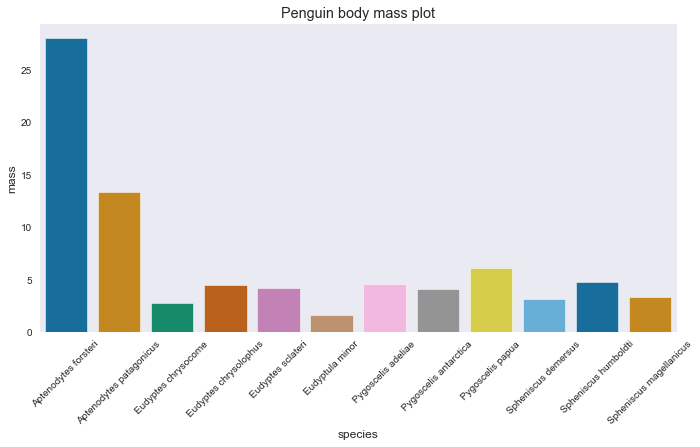

In [103]:
# create a plot object "species_mass"
# specofy the x and y axes as, 'species' and 'mass' respectively
# plot  type specified as 'bars'

# # rotates the x axis labels 

sns.set_style("dark")
species_mass = sns.catplot(data = penguins_df,
 x="species", 
 y="mass",
  kind="bar",
   aspect = 2, 
   palette ='colorblind').set(title='Penguin body mass plot')
species_mass.set_xticklabels(rotation=45) 
 
# https://www.geeksforgeeks.org/rotate-axis-tick-labels-in-seaborn-and-matplotlib/

#### *Q1* What is the smallest penguin species? 


##### Eudyptula minor 

#### *Q2* What is the geographical range of this species?

##### New Zealand and southern Australia
###### Peucker, Amanda & Dann, Peter & Burridge, Christopher. (2009). Range-Wide Phylogeography of the Little Penguin (Eudyptula minor): Evidence of Long-Distance Dispersal. Auk. 126. 397-408. 10.1525/auk.2009.08055. 

# #9 
##### Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

No handles with labels found to put in legend.


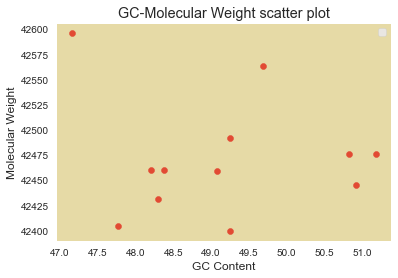

In [102]:
fig, ax =plt.subplots()                                    # plotting a scatter plot
my_scatter_plot = ax.scatter(penguins_df["GC content"],    # GC content from penguins dataframe
penguins_df["Molecular Weight"] )                          # Molecular Weight from penguins dataframe


plt.title('GC-Molecular Weight scatter plot')  # Main label
plt.xlabel('GC Content')                       # X axis label
plt.ylabel('Molecular Weight')                 # y axis label
plt.legend ()                                  # Added a title, labeled x and y axes
ax.set_facecolor('xkcd:beige')                 # Plot backgrounf color as 'beige'


# #10
#### Save the new DataFrame to a file called "penguins_mass_cytb.csv"

In [87]:
penguins_df.to_csv('penguins_mass_cytb.csv', index=False) #saving the new dataframe

# #11 BONUS
#### What else can we do with this dataset in Python? Add functions or anything that might be interesting and fun. (optional)